In [1]:
import os
os.chdir('/nfs/homedirs/rachwan/Evaluation-Tool')

# ResNet18

In [2]:
import copy

from models.networks.ResNet18 import ResNet18

from models.metrics.Evaluator import Evaluator

## Load Model

In [3]:
model = ResNet18()

## Load Evaluation Tool

In [4]:
evaluator = Evaluator()

## Evaluate model inference on an image of size 224 and a batch size of 64

In [5]:
evaluator.evaluate_inference(model, tuple([3,224,224]), 'cuda', iterations= 10, batch_size=64)

## Compile all evaluated metrics

In [6]:
r18metrics = copy.deepcopy(evaluator.get_all_metrics())
r18metrics

{'flops': 3.6375898880000004,
 'macs': 1.8194677760000002,
 'dmas': 1.83630124,
 'time': 10.85849609375,
 'gpu': 1.4933719040000002,
 'disk': 49.65700725,
 'cost': 0.82,
 'emission': 0.014952362115146486,
 'energy': 0.049675621645004935}

# ResNet50

In [7]:
from models.networks.ResNet50 import ResNet50

In [8]:
model = ResNet50()

In [9]:
evaluator = Evaluator()

In [10]:
evaluator.evaluate_inference(model, tuple([3,224,224]), 'cuda', iterations=10, batch_size=64)

In [11]:
r50metrics = copy.deepcopy(evaluator.get_all_metrics())
r50metrics

{'flops': 8.214976896000001,
 'macs': 4.111916032,
 'dmas': 4.150910458,
 'time': 30.040985107421875,
 'gpu': 5.630437376000001,
 'disk': 158.1608525,
 'cost': 0.82,
 'emission': 0.016598805313987684,
 'energy': 0.05514553260461025}

# Compare Models

In [12]:
import matplotlib.pyplot as plt
import numpy as np

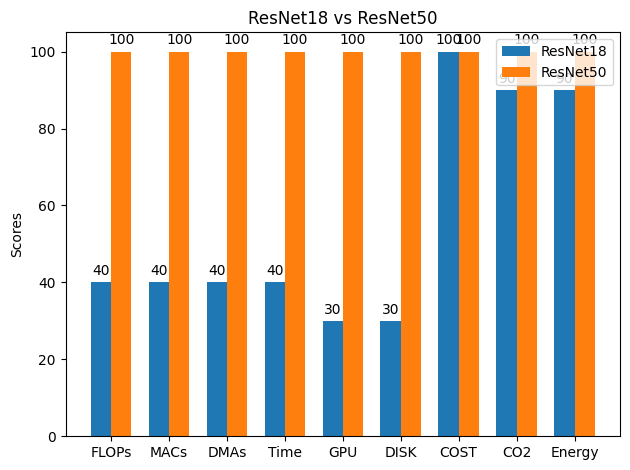

In [13]:
labels = ['FLOPs', 'MACs', 'DMAs', 'Time', 'GPU', 'DISK', 'COST', 'CO2', 'Energy']
r18_means = [round(r18/r50,1) * 100 for r18, r50 in zip(r18metrics.values(), r50metrics.values())]
r50_means = [100 for v in r50metrics.values()]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, r18_means, width, label='ResNet18')
rects2 = ax.bar(x + width/2, r50_means, width, label='ResNet50')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('ResNet18 vs ResNet50')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()